# Nucleus plotter

Simple illustration of nuclei and electron shells.

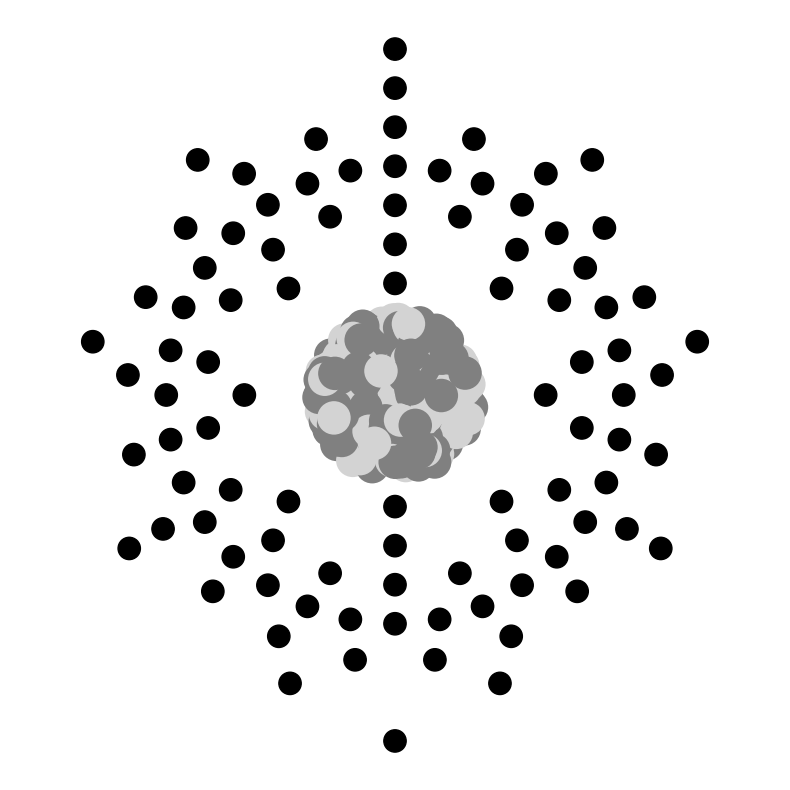

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plotNucleus(N,P,R,rn):
    """Function to plot the nucleus
    Currently, the function samples random locations within a circle with radius R
    where it draws small circles to represent neutrons and protons.
    TODO: - implement some model to modify spatial distribution of protons/neutrons
          - implement some model to account for less spherical shape 
          - implement some model to make sure that nucleons overlap (build from center etc.)
    
    Parameters
    ----------
    N : int
        number of neutrons
    P : int
        number of protons
    R : float
        arbitrary radius of the nucleus
    rn : float
        arbitrary radius of the nucleons
        
    Note
    ----
    Colors inherited from outside
    """
    while (N+P)>0:
        particle=np.random.choice(['N','P'],p=[N/(N+P),P/(N+P)])
        if particle == 'N' and N>0:
            length = R*np.sqrt(np.random.uniform(0, 1))
            angle = np.pi * np.random.uniform(0, 2)
            xnoise = length * np.cos(angle)
            ynoise = length * np.sin(angle)
            circle3=plt.Circle((xnoise,ynoise),rn,facecolor=colors['N'],edgecolor=None)
            ax.add_artist(circle3)
            N-=1
        elif particle=='P' and P>0:
            length = R*np.sqrt(np.random.uniform(0, 1))
            angle = np.pi * np.random.uniform(0, 2)
            xnoise = length * np.cos(angle)
            ynoise = length * np.sin(angle)
            circle3=plt.Circle((xnoise,ynoise),0.3,facecolor=colors['P'],edgecolor=None)
            ax.add_artist(circle3)
            P-=1
        else:
            #will never make it here, since by then the probability is zero in choice
            pass

def plotElectrons(electrons, r0,d,re,ec='black'):
    """Function to plot electron shells
    Currently the function distributes the neutrons nicely at equal angles on each shell
    TODO:  -implement model to represent different distance between shells (if makes sense)
    
    Parameters
    ----------
    electrons : list
        list of integers describing the number of electrons per shell
    r0 : float
        arbitrary radius of inner most shell
    d : float
        arbitrary distance of shells
    re : float
        arbitrary radius of electrons
        
    Note
    ----
    Colors inherited from outside
    """
    for i,electron in enumerate(electrons):
        circle1=plt.Circle((0,0),r0+i*d,facecolor='None',edgecolor=ec)
        ax.add_artist(circle1)
        angles=np.linspace(0,360,electron+1)
        for angle in angles[:-1]:
            xdot=np.sin(np.deg2rad(angle))*(r0+i*d)
            ydot=np.cos(np.deg2rad(angle))*(r0+i*d) #to make sure it is rotated as i want
            circle2=plt.Circle((xdot,ydot),re,facecolor=colors['E'],edgecolor=colors['E'])
            ax.add_artist(circle2)

#EXAMPLE INPUTS
colors={'N':'gray','P':'lightgray','E':'black'}
#colors={'N':'blue','P':'red','E':'black'}
            
#these are some radii the figure looks pleasing, though not scientifically correct of course
r0=2
d=0.7
re=0.2

R=1.4
rn=0.3

#these are representative of U-235
electrons=[2, 8, 18, 32, 21, 9, 2] #electrons per shell
P=92
N=143

#and the figure, uncomment any function if need only electrons or nucleus
fig, ax = plt.subplots(figsize=(8,8))
plotElectrons(electrons,r0,d,re,'None')
plotNucleus(N,P,R,rn)
plt.xlim(-(r0+len(electrons)*d),r0+len(electrons)*d)
plt.ylim(-(r0+len(electrons)*d),r0+len(electrons)*d)
plt.gca().set_aspect('equal', adjustable='box')
ax.axis('off')
plt.tight_layout()
#plt.savefig("u235.svg")
#plt.savefig('u235_nucleus.png',transparent=True,dpi=300)
plt.show()
